### Load data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

In [3]:
df = pd.read_excel('/content/drive/MyDrive/M0n132/pilpres2024.xlsx')
df

,teks,kelas
0,Cuman di pemilihan presiden 2024 ini akhirnya ...,positif
1,@Kimberley_2024 Aneh loe ! Kan lg kompetisi pe...,negatif
2,"https://t.co/uUxW18hEBc, Jakarta -¬†Komisi Pem...",netral
3,Panglima TNI Laksamana Yudo Margono mengatakan...,netral
4,Wakil Presiden Ma'ruf Amin meminta seluruh kep...,netral
...,...,...
1263,Ada prosesi kecil di rumah. Ngalelembu atau m...,positif
1264,@oryaoiii @realfedinuril @jokowi @Kiyai_MarufA...,negatif
1265,@prabowo @jokowi Selamat pak prabowo jadi pres...,positif
1266,@jonih_57 @Kimberley_PS08 @prabowo @PDemokrat ...,negatif


In [4]:
data_before_duplicate = len(df)
data_before_duplicate

1268

### Preprocessing

#### Hapus duplicate data

In [5]:
# Hapus data duplikat bersamaan dengan indeksnya
df_no_duplicates =  df[~df.duplicated(keep=False)]

In [6]:
# Reset indeks setelah menghapus data duplikat
df_no_duplicates = df_no_duplicates.reset_index(drop=True)
df = df_no_duplicates

In [7]:
df

,teks,kelas
0,Cuman di pemilihan presiden 2024 ini akhirnya ...,positif
1,@Kimberley_2024 Aneh loe ! Kan lg kompetisi pe...,negatif
2,"https://t.co/uUxW18hEBc, Jakarta -¬†Komisi Pem...",netral
3,Panglima TNI Laksamana Yudo Margono mengatakan...,netral
4,Wakil Presiden Ma'ruf Amin meminta seluruh kep...,netral
...,...,...
1041,Ada prosesi kecil di rumah. Ngalelembu atau m...,positif
1042,@oryaoiii @realfedinuril @jokowi @Kiyai_MarufA...,negatif
1043,@prabowo @jokowi Selamat pak prabowo jadi pres...,positif
1044,@jonih_57 @Kimberley_PS08 @prabowo @PDemokrat ...,negatif


In [8]:
data_after_duplicate = len(df)
data_after_duplicate

1046

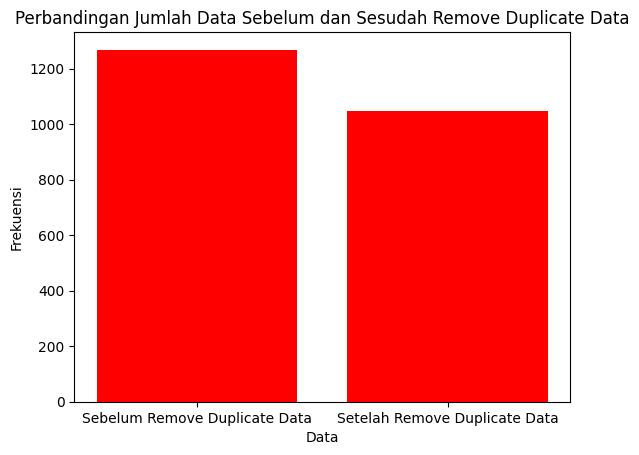

In [9]:
import matplotlib.pyplot as plt

words = ['Sebelum Remove Duplicate Data', 'Setelah Remove Duplicate Data']
frequencies = [data_before_duplicate, data_after_duplicate]

# Membuat diagram batang
plt.bar(words, frequencies, color='red')

# Menambahkan judul dan label
plt.title('Perbandingan Jumlah Data Sebelum dan Sesudah Remove Duplicate Data')
plt.xlabel('Data')
plt.ylabel('Frekuensi')

# Menampilkan diagram
plt.show()


#### Casefolding

In [10]:
def clean_lower(lwr):
    lwr = lwr.lower() # lowercase text
    return lwr

# Buat kolom tambahan untuk data description yang telah dicasefolding
df['lwr'] = df['teks'].apply(clean_lower)
# casefolding=pd.DataFrame(df['lwr'])
# casefolding

In [11]:
df[['teks','lwr']]

,teks,lwr
0,Cuman di pemilihan presiden 2024 ini akhirnya ...,cuman di pemilihan presiden 2024 ini akhirnya ...
1,@Kimberley_2024 Aneh loe ! Kan lg kompetisi pe...,@kimberley_2024 aneh loe ! kan lg kompetisi pe...
2,"https://t.co/uUxW18hEBc, Jakarta -¬†Komisi Pem...","https://t.co/uuxw18hebc, jakarta -¬†komisi pem..."
3,Panglima TNI Laksamana Yudo Margono mengatakan...,panglima tni laksamana yudo margono mengatakan...
4,Wakil Presiden Ma'ruf Amin meminta seluruh kep...,wakil presiden ma'ruf amin meminta seluruh kep...
...,...,...
1041,Ada prosesi kecil di rumah. Ngalelembu atau m...,ada prosesi kecil di rumah. ngalelembu atau m...
1042,@oryaoiii @realfedinuril @jokowi @Kiyai_MarufA...,@oryaoiii @realfedinuril @jokowi @kiyai_marufa...
1043,@prabowo @jokowi Selamat pak prabowo jadi pres...,@prabowo @jokowi selamat pak prabowo jadi pres...
1044,@jonih_57 @Kimberley_PS08 @prabowo @PDemokrat ...,@jonih_57 @kimberley_ps08 @prabowo @pdemokrat ...


#### Remove Punctuation

In [12]:
import re
import string

#Remove Puncutuation
clean_spcl = re.compile('[/(){}\[\]\|@,;]')
clean_symbol = re.compile('[^0-9a-z]')
def clean_punct(text):
    text = clean_spcl.sub('', text)
    text = clean_symbol.sub(' ', text)
    return text
# Buat kolom tambahan untuk data description yang telah diremovepunctuation
df['clean_punct'] = df['lwr'].apply(clean_punct)
df

,teks,kelas,lwr,clean_punct
0,Cuman di pemilihan presiden 2024 ini akhirnya ...,positif,cuman di pemilihan presiden 2024 ini akhirnya ...,cuman di pemilihan presiden 2024 ini akhirnya ...
1,@Kimberley_2024 Aneh loe ! Kan lg kompetisi pe...,negatif,@kimberley_2024 aneh loe ! kan lg kompetisi pe...,kimberley 2024 aneh loe kan lg kompetisi pem...
2,"https://t.co/uUxW18hEBc, Jakarta -¬†Komisi Pem...",netral,"https://t.co/uuxw18hebc, jakarta -¬†komisi pem...",https t couuxw18hebc jakarta komisi pemilih...
3,Panglima TNI Laksamana Yudo Margono mengatakan...,netral,panglima tni laksamana yudo margono mengatakan...,panglima tni laksamana yudo margono mengatakan...
4,Wakil Presiden Ma'ruf Amin meminta seluruh kep...,netral,wakil presiden ma'ruf amin meminta seluruh kep...,wakil presiden ma ruf amin meminta seluruh kep...
...,...,...,...,...
1041,Ada prosesi kecil di rumah. Ngalelembu atau m...,positif,ada prosesi kecil di rumah. ngalelembu atau m...,ada prosesi kecil di rumah ngalelembu atau m...
1042,@oryaoiii @realfedinuril @jokowi @Kiyai_MarufA...,negatif,@oryaoiii @realfedinuril @jokowi @kiyai_marufa...,oryaoiii realfedinuril jokowi kiyai marufamin ...
1043,@prabowo @jokowi Selamat pak prabowo jadi pres...,positif,@prabowo @jokowi selamat pak prabowo jadi pres...,prabowo jokowi selamat pak prabowo jadi presid...
1044,@jonih_57 @Kimberley_PS08 @prabowo @PDemokrat ...,negatif,@jonih_57 @kimberley_ps08 @prabowo @pdemokrat ...,jonih 57 kimberley ps08 prabowo pdemokrat sbyu...


In [13]:
df[['lwr','clean_punct']]

,lwr,clean_punct
0,cuman di pemilihan presiden 2024 ini akhirnya ...,cuman di pemilihan presiden 2024 ini akhirnya ...
1,@kimberley_2024 aneh loe ! kan lg kompetisi pe...,kimberley 2024 aneh loe kan lg kompetisi pem...
2,"https://t.co/uuxw18hebc, jakarta -¬†komisi pem...",https t couuxw18hebc jakarta komisi pemilih...
3,panglima tni laksamana yudo margono mengatakan...,panglima tni laksamana yudo margono mengatakan...
4,wakil presiden ma'ruf amin meminta seluruh kep...,wakil presiden ma ruf amin meminta seluruh kep...
...,...,...
1041,ada prosesi kecil di rumah. ngalelembu atau m...,ada prosesi kecil di rumah ngalelembu atau m...
1042,@oryaoiii @realfedinuril @jokowi @kiyai_marufa...,oryaoiii realfedinuril jokowi kiyai marufamin ...
1043,@prabowo @jokowi selamat pak prabowo jadi pres...,prabowo jokowi selamat pak prabowo jadi presid...
1044,@jonih_57 @kimberley_ps08 @prabowo @pdemokrat ...,jonih 57 kimberley ps08 prabowo pdemokrat sbyu...


#### Remove Double White Space

In [14]:
def _normalize_whitespace(text):
    corrected = str(text)
    corrected = re.sub(r"//t",r"\t", corrected)
    corrected = re.sub(r"( )\1+",r"\1", corrected)
    corrected = re.sub(r"(\n)\1+",r"\1", corrected)
    corrected = re.sub(r"(\r)\1+",r"\1", corrected)
    corrected = re.sub(r"(\t)\1+",r"\1", corrected)
    return corrected.strip(" ")
df['clean_double_ws'] = df['clean_punct'].apply(_normalize_whitespace)
df[['clean_punct','clean_double_ws']]

,clean_punct,clean_double_ws
0,cuman di pemilihan presiden 2024 ini akhirnya ...,cuman di pemilihan presiden 2024 ini akhirnya ...
1,kimberley 2024 aneh loe kan lg kompetisi pem...,kimberley 2024 aneh loe kan lg kompetisi pemil...
2,https t couuxw18hebc jakarta komisi pemilih...,https t couuxw18hebc jakarta komisi pemilihan ...
3,panglima tni laksamana yudo margono mengatakan...,panglima tni laksamana yudo margono mengatakan...
4,wakil presiden ma ruf amin meminta seluruh kep...,wakil presiden ma ruf amin meminta seluruh kep...
...,...,...
1041,ada prosesi kecil di rumah ngalelembu atau m...,ada prosesi kecil di rumah ngalelembu atau men...
1042,oryaoiii realfedinuril jokowi kiyai marufamin ...,oryaoiii realfedinuril jokowi kiyai marufamin ...
1043,prabowo jokowi selamat pak prabowo jadi presid...,prabowo jokowi selamat pak prabowo jadi presid...
1044,jonih 57 kimberley ps08 prabowo pdemokrat sbyu...,jonih 57 kimberley ps08 prabowo pdemokrat sbyu...


#### Tokenization

In [15]:
!pip install nltk

In [16]:
import nltk
nltk.download('punkt')

df['tokenized_sents'] = df.apply(lambda row: nltk.word_tokenize(row['clean_double_ws']), axis=1)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [17]:
df[['clean_double_ws','tokenized_sents']]

,clean_double_ws,tokenized_sents
0,cuman di pemilihan presiden 2024 ini akhirnya ...,"[cuman, di, pemilihan, presiden, 2024, ini, ak..."
1,kimberley 2024 aneh loe kan lg kompetisi pemil...,"[kimberley, 2024, aneh, loe, kan, lg, kompetis..."
2,https t couuxw18hebc jakarta komisi pemilihan ...,"[https, t, couuxw18hebc, jakarta, komisi, pemi..."
3,panglima tni laksamana yudo margono mengatakan...,"[panglima, tni, laksamana, yudo, margono, meng..."
4,wakil presiden ma ruf amin meminta seluruh kep...,"[wakil, presiden, ma, ruf, amin, meminta, selu..."
...,...,...
1041,ada prosesi kecil di rumah ngalelembu atau men...,"[ada, prosesi, kecil, di, rumah, ngalelembu, a..."
1042,oryaoiii realfedinuril jokowi kiyai marufamin ...,"[oryaoiii, realfedinuril, jokowi, kiyai, maruf..."
1043,prabowo jokowi selamat pak prabowo jadi presid...,"[prabowo, jokowi, selamat, pak, prabowo, jadi,..."
1044,jonih 57 kimberley ps08 prabowo pdemokrat sbyu...,"[jonih, 57, kimberley, ps08, prabowo, pdemokra..."


In [18]:
df['tokenized_sents_string']=df.tokenized_sents.apply(lambda x: ', '.join([str(i) for i in x]))

In [19]:
df['tokenized_sents_string'].values

array(['cuman, di, pemilihan, presiden, 2024, ini, akhirnya, ada, capres, cawapres, yang, bisa, kasi, standar, minimal, kampanye, yang, bermakna, dan, memberi, ide, gagasannya, untuk, bangsa, secara, terbuka, gak, sekedar, gimmick, modal, jadi, rakyat, cilik, gemoy, pencitraan, dll',
       'kimberley, 2024, aneh, loe, kan, lg, kompetisi, pemilihan, presiden, klo, ga, mau, diusik, meneng, bae, dirumah, emang, gerombolan, loe, ga, usik, capres, lain, kocak, loe',
       'https, t, couuxw18hebc, jakarta, komisi, pemilihan, umum, kpu, buka, suara, usai, ramai, polemik, ijazah, palsu, calon, wakil, presiden, cawapres, gibran, rakabuming, selengkapnya, https, t, coidyw52rkgk, kpu, gibran, cawapres, ijazah, pilpres, wahananews, https, t, cotpaxs3clly',
       ...,
       'prabowo, jokowi, selamat, pak, prabowo, jadi, presiden, ri, 2024, semoga, panjang, umur, dan, sukses',
       'jonih, 57, kimberley, ps08, prabowo, pdemokrat, sbyudhoyono, prabowo, itu, di, pecat, masa, pecatan, naik, pangk

In [20]:
!pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 806.7 kB/s eta 0:00:00


#### Stopword Removal

In [21]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
stop_factory = StopWordRemoverFactory()
more_stopword = ['dengan','ia','bahwa','oleh', 'https','yg']
data = stop_factory.get_stop_words()+more_stopword
stopword = stop_factory.create_stop_word_remover()
print(data)

['yang', 'untuk', 'pada', 'ke', 'para', 'namun', 'menurut', 'antara', 'dia', 'dua', 'ia', 'seperti', 'jika', 'jika', 'sehingga', 'kembali', 'dan', 'tidak', 'ini', 'karena', 'kepada', 'oleh', 'saat', 'harus', 'sementara', 'setelah', 'belum', 'kami', 'sekitar', 'bagi', 'serta', 'di', 'dari', 'telah', 'sebagai', 'masih', 'hal', 'ketika', 'adalah', 'itu', 'dalam', 'bisa', 'bahwa', 'atau', 'hanya', 'kita', 'dengan', 'akan', 'juga', 'ada', 'mereka', 'sudah', 'saya', 'terhadap', 'secara', 'agar', 'lain', 'anda', 'begitu', 'mengapa', 'kenapa', 'yaitu', 'yakni', 'daripada', 'itulah', 'lagi', 'maka', 'tentang', 'demi', 'dimana', 'kemana', 'pula', 'sambil', 'sebelum', 'sesudah', 'supaya', 'guna', 'kah', 'pun', 'sampai', 'sedangkan', 'selagi', 'sementara', 'tetapi', 'apakah', 'kecuali', 'sebab', 'selain', 'seolah', 'seraya', 'seterusnya', 'tanpa', 'agak', 'boleh', 'dapat', 'dsb', 'dst', 'dll', 'dahulu', 'dulunya', 'anu', 'demikian', 'tapi', 'ingin', 'juga', 'nggak', 'mari', 'nanti', 'melainkan', '

In [22]:
from nltk.corpus import stopwords

nltk.download('stopwords')

# Import stopwords setelah diunduh
from nltk.corpus import stopwords
list_stopwords = stopwords.words('indonesian')

#clean stopwords
stopword = set(data)
def clean_stopwords(text):
    text = ' '.join(word for word in text.split() if word not in stopword) # hapus stopword dari kolom deskripsi
    return text
# Buat kolom tambahan untuk data description yang telah distopwordsremoval
df['clean_sw'] = df['tokenized_sents_string'].apply(clean_stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [23]:
df[['tokenized_sents', 'clean_sw']]

,tokenized_sents,clean_sw
0,"[cuman, di, pemilihan, presiden, 2024, ini, ak...","cuman, di, pemilihan, presiden, 2024, ini, akh..."
1,"[kimberley, 2024, aneh, loe, kan, lg, kompetis...","kimberley, 2024, aneh, loe, kan, lg, kompetisi..."
2,"[https, t, couuxw18hebc, jakarta, komisi, pemi...","https, t, couuxw18hebc, jakarta, komisi, pemil..."
3,"[panglima, tni, laksamana, yudo, margono, meng...","panglima, tni, laksamana, yudo, margono, menga..."
4,"[wakil, presiden, ma, ruf, amin, meminta, selu...","wakil, presiden, ma, ruf, amin, meminta, selur..."
...,...,...
1041,"[ada, prosesi, kecil, di, rumah, ngalelembu, a...","ada, prosesi, kecil, di, rumah, ngalelembu, at..."
1042,"[oryaoiii, realfedinuril, jokowi, kiyai, maruf...","oryaoiii, realfedinuril, jokowi, kiyai, marufa..."
1043,"[prabowo, jokowi, selamat, pak, prabowo, jadi,...","prabowo, jokowi, selamat, pak, prabowo, jadi, ..."
1044,"[jonih, 57, kimberley, ps08, prabowo, pdemokra...","jonih, 57, kimberley, ps08, prabowo, pdemokrat..."


#### Stemming

In [24]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
Fact = StemmerFactory()
Stemmer = Fact.create_stemmer()
output = []
for i in range(len(df['clean_sw'])):
    data = df['clean_sw'].iloc[i]
    output.append(Stemmer.stem(data))

In [25]:
df['stemmed'] = pd.DataFrame(output)

In [26]:
df[['clean_sw','stemmed']]

,clean_sw,stemmed
0,"cuman, di, pemilihan, presiden, 2024, ini, akh...",cuman di pilih presiden 2024 ini akhir ada cap...
1,"kimberley, 2024, aneh, loe, kan, lg, kompetisi...",kimberley 2024 aneh loe kan lg kompetisi pilih...
2,"https, t, couuxw18hebc, jakarta, komisi, pemil...",https t couuxw18hebc jakarta komisi pilih umum...
3,"panglima, tni, laksamana, yudo, margono, menga...",panglima tni laksamana yudo margono kata jauh ...
4,"wakil, presiden, ma, ruf, amin, meminta, selur...",wakil presiden ma ruf amin minta seluruh kepal...
...,...,...
1041,"ada, prosesi, kecil, di, rumah, ngalelembu, at...",ada prosesi kecil di rumah ngalelembu atau car...
1042,"oryaoiii, realfedinuril, jokowi, kiyai, marufa...",oryaoiii realfedinuril jokowi kiyai marufamin ...
1043,"prabowo, jokowi, selamat, pak, prabowo, jadi, ...",prabowo jokowi selamat pak prabowo jadi presid...
1044,"jonih, 57, kimberley, ps08, prabowo, pdemokrat...",jonih 57 kimberley ps08 prabowo pdemokrat sbyu...


#### Pembobotan dengan TF iDF

In [27]:
# Pisahkan data menjadi fitur (X) dan label (y)
X = df['stemmed']
y = df['kelas']

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Proses pembobotan TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(X)

In [29]:
# Buat DataFrame untuk menampilkan hasil
df_tfidf = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

In [30]:
df_tfidf

,00,000,007,01,01aminwinelection,02,023,03,04,08,...,yupi,yusril,yusrilihza,zamagi17,zaman,zara,zey,zoelfick,zulkiflilubis69,zy
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1041,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1042,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1043,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1044,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Cek distribusi kelas

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

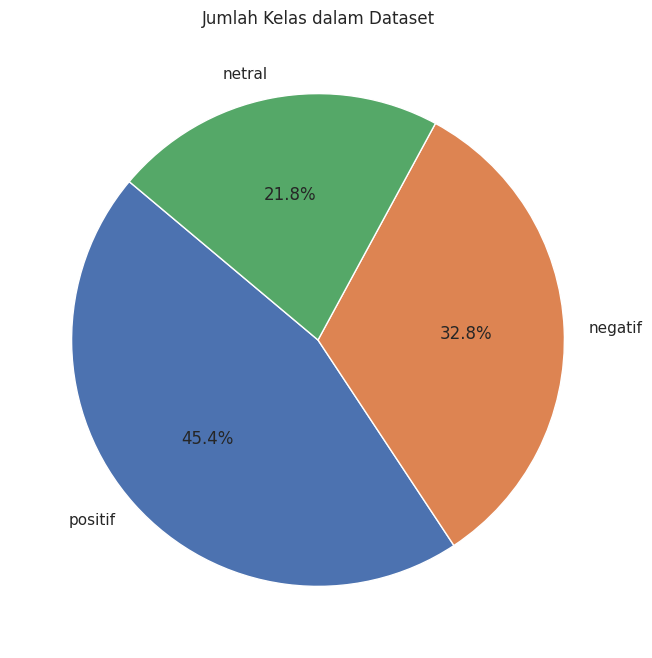

In [32]:
# Hitung jumlah kelas
class_counts = df['kelas'].value_counts()

# Buat diagram pie dengan seaborn
plt.figure(figsize=(8, 8))
sns.set(style="whitegrid")
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Jumlah Kelas dalam Dataset')
plt.show()

dari pie chart di atas, dapat diketahui bahwa terjadi ketidakseimbangan jumlah kelas, oleh karena itu pada tahap preprocessing ini, perlu dilakukan oversampling agar jumlah kelas menjadi seimbang

#### Oversampling

In [33]:
from imblearn.over_sampling import SMOTE

# Menangani ketidakseimbangan kelas dengan oversampling menggunakan SMOTE
oversampler = SMOTE(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X_tfidf, y)

In [34]:
y_resampled

0       positif
1       negatif
2        netral
3        netral
4        netral
         ...   
1420     netral
1421     netral
1422     netral
1423     netral
1424     netral
Name: kelas, Length: 1425, dtype: object

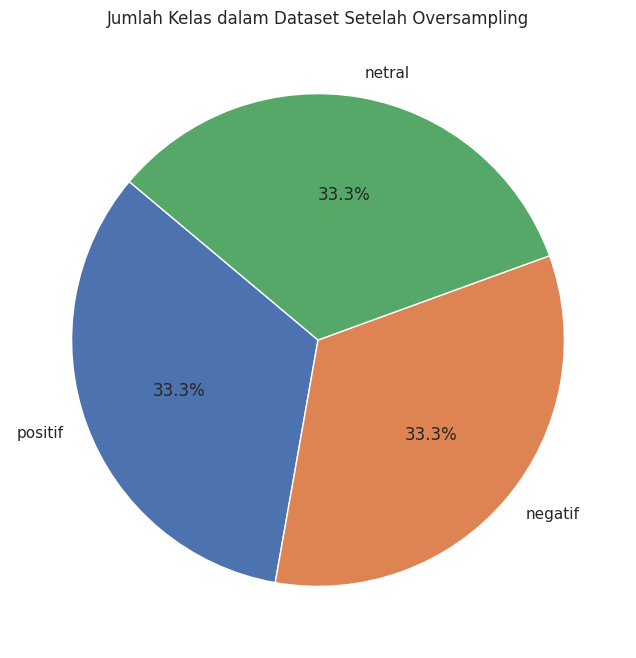

In [35]:
# Hitung jumlah kelas
class_counts_after_oversampling = y_resampled.value_counts()

# Buat diagram pie dengan seaborn
plt.figure(figsize=(8, 8))
sns.set(style="whitegrid")
plt.pie(class_counts_after_oversampling, labels=class_counts_after_oversampling.index, autopct='%1.1f%%', startangle=140)
plt.title('Jumlah Kelas dalam Dataset Setelah Oversampling')
plt.show()

In [36]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
y_encoded = labelencoder.fit_transform(y_resampled)

#### Pembagian Data

In [37]:
from sklearn.model_selection import train_test_split

# Pisahkan data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_encoded, test_size=0.2, random_state=42)

In [38]:
y_train.shape

(1140,)

In [39]:
y_test.shape

(285,)

### Processing Dengan XGBoost

In [53]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# parameter yang ingin diuji dengan grid search
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05],
    'max_depth': [3, 6, 9]
}

In [54]:
# Inisialisasi model XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

In [55]:
# Inisialisasi objek GridSearchCV
grid_search = GridSearchCV(xgb_model, param_grid, cv=3, scoring='accuracy')

In [56]:
# Latih model dengan grid search
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.05], 'max_depth': [3, 6, 9],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [57]:
#Setelah pelatihan selesai, kombinasi parameter terbaik:
best_parameters = grid_search.best_params_
print("Best parameters found: ", best_parameters)

Best parameters found:  {'learning_rate': 0.05, 'max_depth': 9, 'n_estimators': 200}


In [58]:
# Dan juga menggunakan model terbaik yang ditemukan oleh GridSearchCV:
best_model = grid_search.best_estimator_

In [61]:
# Lakukan prediksi pada data uji dengan model terbaik
y_pred = grid_search.predict(X_test)

In [63]:
grid_search.score(X_test,y_test)

0.8350877192982457

In [64]:
grid_search.score(X_train, y_train)

0.9929824561403509

#### Evaluasi

In [65]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [66]:
# Display results
print(f'Accuracy: {accuracy}')
print('\nConfusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(classification_rep)

Accuracy: 0.8350877192982457

Confusion Matrix:
[[82  0 13]
 [ 3 79  8]
 [ 9 14 77]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.86      0.87        95
           1       0.85      0.88      0.86        90
           2       0.79      0.77      0.78       100

    accuracy                           0.84       285
   macro avg       0.84      0.84      0.84       285
weighted avg       0.83      0.84      0.83       285



In [67]:
# Simpan daftar kelas sebelum label encoding
original_classes = y.unique()

In [68]:
original_classes

array(['positif', 'negatif', 'netral'], dtype=object)

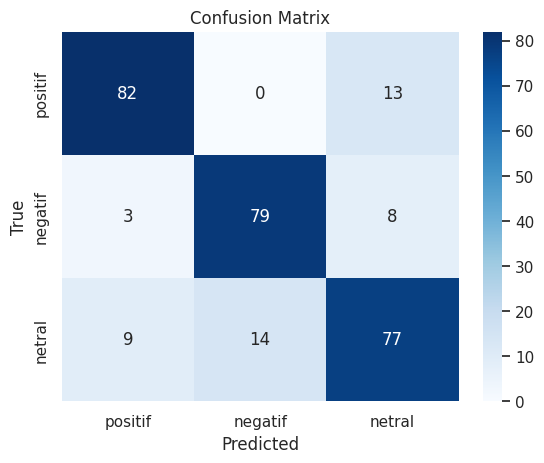

In [69]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=original_classes, yticklabels=original_classes)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()